In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

# read and display the original image
img = mpimg.imread('./stop-634941_640.jpg')

plt.imshow(img)

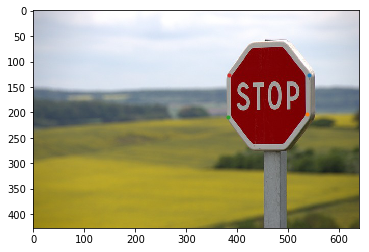

In [3]:
%matplotlib inline

# source image points

plt.imshow(img)
# plt.plot(850, 320, '.')  # top right
# plt.plot(865, 450, '.')  # bottom right
# plt.plot(533, 350, '.')  # bottom left
# plt.plot(535, 210, '.')  # top left

plt.plot(542, 126, '.')  # top right
plt.plot(538, 204, '.')  # bottom right
plt.plot(382, 208, '.')  # bottom left
plt.plot(384, 127, '.')  # top left

In [8]:
# define perspective transform function
def warp(img):
    # define calibration box in source (aka original) and destination (desired or warped) coordinates
    img_size = (img.shape[1], img.shape[0])
    
    # four source coordinates
    src = np.float32(
        [
            [542, 126],  # top right
            [538, 204],  # bottom right
            [382, 208],  # bottom left
            [384, 127]  # top left
        ]
    )

#    dst = np.float32(
#        [
            # this made it tilt down to bottom left
#            [542, 110],  # top right
#            [538, 190],  # bottom right
#            [382, 208],  # bottom left
#            [384, 127]  # top left
#        ]
#    )

    # four desired coordinates
#    dst = np.float32(
#        [
            # this made it tilt up to top left, which is good.
            # TODO now swivel sign to face me
#            [542, 133],  # top right
#            [538, 213],  # bottom right
#            [382, 208],  # bottom left
#            [384, 127]  # top left
#        ]
#    )

    dst = np.float32(
        [
            # TODO 
            [542, 126],  # top right
            [542, 204],  # bottom right
            [376, 204],  # bottom left
            [376, 126]  # top left
        ]
    )

    
    # compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # could also compute the inverse by swapping the input parameter 
    # aka reverse the above transform
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # create warped image : uses linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

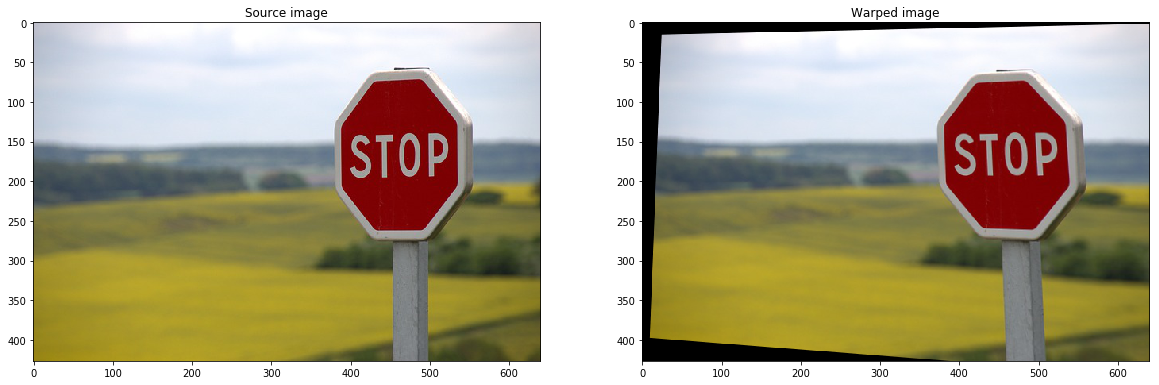

In [9]:
%matplotlib inline

# get perspective transform
warped_im = warp(img)

# visualise undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped image')
ax2.imshow(warped_im)